## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 1000)

import requests
import pandas as pd
from bs4 import BeautifulSoup

from team_map import team_map

## Pull play by play data from nflscrapR

In [4]:
seasons = [2015, 2016, 2017, 2018, 2019]
weeks = [str(w) for w in range(1, 18)]
pbp_url = 'https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/play_by_play_data/regular_season/reg_pbp_'
weather_url = 'http://www.nflweather.com/en/week/'

def pull_pbp_data(seasons, weeks):
    pbp_lst = []
#    pbp_url = 'https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/play_by_play_data/regular_season/reg_pbp_'
    for season in seasons:
        print(f'Reading in Play-By-Play data for the {season} season')
        season_pbp = pd.read_csv(pbp_url + str(season) + '.csv')
        pbp_lst.append(season_pbp)

    pbp_df = pd.concat(pbp_lst).reset_index(drop=True)
    
    pbp_df['game_date'] = pd.to_datetime(pbp_df['game_date'])
    pbp_df['month'] = pbp_df.game_date.dt.month
    pbp_df['year'] = pbp_df.game_date.dt.year
    
    return pbp_df

#Pull Play-By-Play Data NFL scrapR github
pbp_df = pull_pbp_data(seasons, weeks)

Reading in Play-By-Play data for the 2015 season
Reading in Play-By-Play data for the 2016 season
Reading in Play-By-Play data for the 2017 season
Reading in Play-By-Play data for the 2018 season
Reading in Play-By-Play data for the 2019 season


## Define a Player Class
    return play-by-play and relevant information for a player

In [5]:
class Player:
    
    def __init__(self, number, position, team, name, player_id):
        self.number = number
        self.position = position
        self.team = team
        self.name = name
        self.player_id = player_id
        
    def get_player_pbp_data(self, pbp_df):
        pos_col = self.position + '_player_id'
        player_pbp_df = pbp_df.loc[pbp_df[pos_col] == self.player_id].reset_index(drop=True)
        
        return player_pbp_df
    
    def get_stats_per_game(self, player_pbp_df, stat_lst):
        
        return player_pbp_df.groupby(['game_id','year','month','home_team','away_team'], as_index=False)[stat_lst].sum()

Instantiate the class for Amari

In [47]:
amari = Player(80, 'receiver', 'Cowboys', 'A.Cooper', '00-0031544')
amari_pbp = amari.get_player_pbp_data(pbp_df)
#Filter out Jan games
amari_pbp = amari_pbp.loc[amari_pbp.month >= 9]
amari_stats_per_game = amari.get_stats_per_game(amari_pbp, ['yards_gained', 'epa'])
amari_stats_per_game['amari_home'] = np.where((amari_stats_per_game['home_team'] == 'OAK') |
                                              (amari_stats_per_game['home_team'] == 'DAL'),
                                            'Y', 'N')

amari_stats_per_game['amari_home'] = amari_stats_per_game['amari_home'].astype('category')

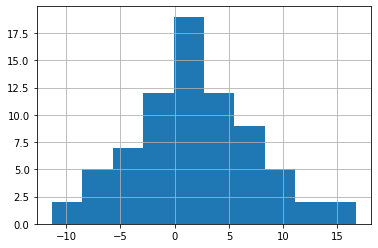

In [50]:
amari_stats_per_game.epa.hist()

In [51]:
amari_stats_per_game['team'] = np.where(amari_stats_per_game['amari_home'] == 'Y', 
                                        amari_stats_per_game['home_team'],
                                        amari_stats_per_game['away_team'])

## Start Exploring the data

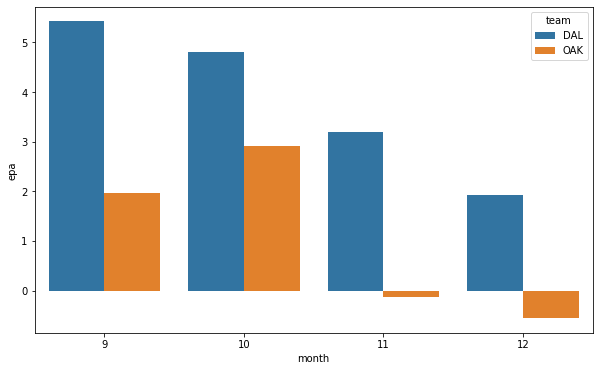

In [52]:
monthly_team_epa_per_game = amari_stats_per_game.groupby(['month', 'team'], as_index=False)['epa'].mean()

plt.figure(figsize=(10,6))
sns.barplot(x= 'month', y = 'epa', data=monthly_team_epa_per_game, hue='team')

## Home vs Road

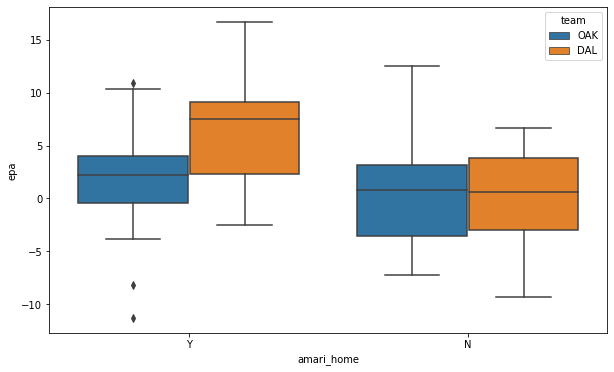

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x= 'amari_home', y = 'epa', data=amari_stats_per_game, hue='team')

In [54]:
amari_pbp.loc[amari_pbp.game_half != 'Overtime']\
    .groupby(['game_id', 'qtr'], as_index=False)['epa'].sum() \
    .groupby(['qtr'])['epa'].mean()

qtr
1    0.330039
2    0.982732
3    1.007411
4   -0.100135
Name: epa, dtype: float64

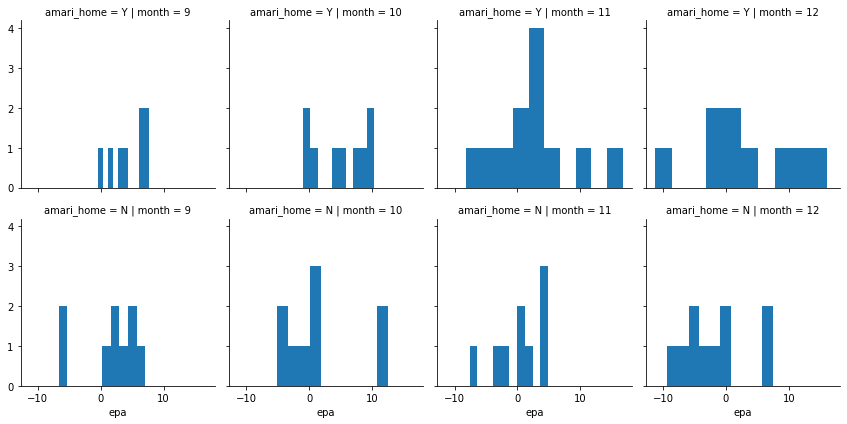

In [57]:
g = sns.FacetGrid(amari_stats_per_game, col="month", row = 'amari_home')
g = g.map(plt.hist, "epa")

In [58]:
amari_stats_per_game[['month', 'amari_home', 'epa']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 3 columns):
month         75 non-null int64
amari_home    75 non-null object
epa           75 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


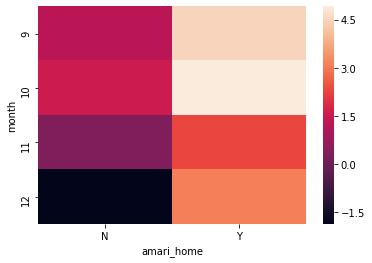

In [76]:
sns.heatmap(amari_stats_per_game.groupby(['month', 'amari_home'], as_index=False)['epa'].mean().pivot('month', 'amari_home', 'epa'))

In [72]:
amari_stats_per_game[['month', 'amari_home', 'epa']]#.pivot('amari_home', 'month', 'epa')

,month,amari_home,epa
0,9,Y,3.665152
1,9,Y,6.575997
2,9,N,4.409706
3,10,N,-1.251932
4,10,Y,3.971684
5,10,N,11.355288
6,11,Y,2.066694
7,11,N,4.907000
8,11,Y,-3.867535
9,11,N,-3.594354


In [68]:
flights = sns.load_dataset("flights")
#flights = flights.pivot("month", "year", "passengers")

In [69]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


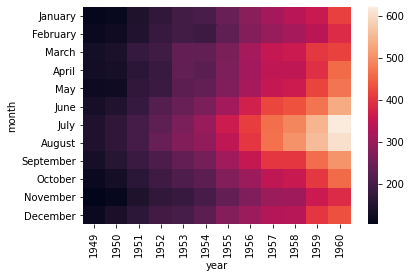

In [64]:
sns.heatmap(flights)

## Scrape Weather Data

In [ ]:
def request_data(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    return soup

def get_team_data(bs_data):
    teams = bs_data.find_all(class_="team-name text-center")

    away_teams = []
    home_teams = []

    for i, v in enumerate(teams):
        if i % 2 == 0:
            away_teams.append(teams[i].find('a').contents[0])
        else:
            home_teams.append(teams[i].find('a').contents[0])
            
    return away_teams, home_teams

def get_weather_data(bs_data):
    games = bs_data.find_all('tr')

    weather_lst = []
    for i, v in enumerate(games):
        #skip header
        if i > 0:
            game_details = games[i].find_all(class_='text-center')

            forecast = game_details[5].contents[0]

            weather_lst.append(' '.join(forecast.split()))
            
    return weather_lst

weather_lst = []

for season in seasons:
    print(f'Scraping Weather Data for the {season} Season')
    for week in weeks:
        request_url = f'{weather_url}{season}/week-{week}'
        soup = request_data(request_url)
        
        away_teams, home_teams = get_team_data(soup)
        
        weather = get_weather_data(soup)
        
        weather_df = pd.DataFrame({'away_tm': away_teams,
                                   'home_tm': home_teams,
                                   'weather': weather,
                                  })
        
        weather_df['year'] = season
        weather_df['week'] = week
        
        weather_lst.append(weather_df)
        
full_weather_df = pd.concat(weather_lst).reset_index(drop=True)

coop_weather_df = full_weather_df.loc[(full_weather_df.away_tm.isin(['Cowboys','Raiders'])) |
                                      (full_weather_df.home_tm.isin(['Cowboys','Raiders']))]

amari_pbp = amari_pbp.replace('SD', 'LAC')

coop_weather_df['away_team'] = coop_weather_df['away_tm'].apply(lambda x: team_map[x])
coop_weather_df['home_team'] = coop_weather_df['home_tm'].apply(lambda x: team_map[x])

merged_coop_df = amari_pbp.merge(coop_weather_df, how = 'left', on = ['away_team', 'home_team', 'year'])

merged_coop_df['temp'] = np.where(merged_coop_df.weather == 'DOME',
                                  -999,
                                  merged_coop_df.weather.str.split('f').str[0]).astype(int)

## Explore Performance by Game Temperature

In [ ]:
merged_coop_df['temp_bin'] = np.where(merged_coop_df.temp < 50, "<50",
                                      np.where(merged_coop_df.temp < 75,'50-75',
                                      np.where(merged_coop_df.temp >= 75, '>=75', 'NO TEMP')))

temp_bin_df = merged_coop_df.groupby(['temp_bin'], as_index = False)['game_id',] \
    .agg(pd.Series.nunique) \
    .merge(merged_coop_df.groupby(['temp_bin'], as_index = False)['yards_gained',]
           .agg(np.sum), on = 'temp_bin')

temp_bin_df['yards_per_game'] = temp_bin_df['yards_gained'] / temp_bin_df['game_id']

temp_bin_df.columns = ['temperature', 'games', 'total_yards', 'yards_per_game']

temp_bin_df.yards_per_game = temp_bin_df.yards_per_game.round(1)

temp_bin_df['total_yards'] = temp_bin_df.apply(lambda x: "{:,}".format(x['total_yards']), axis=1)
temp_bin_df.sort_values('yards_per_game')

In [ ]:
print('hello')

In [ ]:
def is_prime(num):
    if num > 1:
        return all([num % n != 0 for n in range(2, num)])
    else:
        return False

In [ ]:
is_prime(7)